In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)

In [2]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/personality_datasert.csv')
df['Drained_after_socializing'] = pd.Series(map(lambda x: x == 'Yes', df['Drained_after_socializing']))
df['Stage_fear'] = pd.Series(map(lambda x: x == 'Yes', df['Stage_fear']))
df['Personality'] = pd.Series(map(lambda x: x == 'Extrovert', df['Personality']))
df


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,False,4.0,6.0,False,13.0,5.0,True
1,9.0,True,0.0,0.0,True,0.0,3.0,False
2,9.0,True,1.0,2.0,True,5.0,2.0,False
3,0.0,False,6.0,7.0,False,14.0,8.0,True
4,3.0,False,9.0,4.0,False,8.0,5.0,True
...,...,...,...,...,...,...,...,...
2895,3.0,False,7.0,6.0,False,6.0,6.0,True
2896,3.0,False,8.0,3.0,False,14.0,9.0,True
2897,4.0,True,1.0,1.0,True,4.0,0.0,False
2898,11.0,True,1.0,3.0,True,2.0,0.0,False


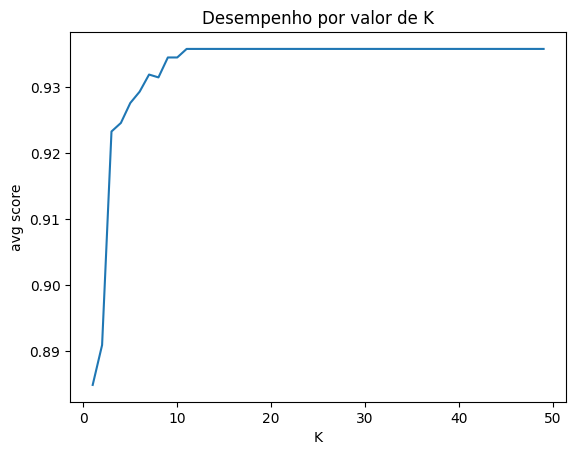

In [21]:
X = df.drop('Personality', axis=1)
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plot_x = []
plot_y = []

for i in range(1, 50):
    classifier = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=i))
    ])
    scores = cross_val_score(classifier, X_train, y_train, cv=5)

    plot_x.append(i)
    plot_y.append(np.average(scores))

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('K')
ax.set_ylabel('avg score')
ax.set_title('Desempenho por valor de K')
ax.plot(plot_x, plot_y)
plt.show()

In [22]:

scores_df = pd.DataFrame({
    'k': pd.Series(plot_x),
    'score': pd.Series(plot_y),
})

scores_df.sort_values(by=['score'], ascending=False)

,k,score
13,14,0.935776
11,12,0.935776
16,17,0.935776
14,15,0.935776
15,16,0.935776
10,11,0.935776
12,13,0.935776
26,27,0.935776
25,26,0.935776
24,25,0.935776


In [23]:
best_k = int(scores_df.sort_values(by=['score'], ascending=False).iloc[0]['k'])
print(f'Melhor k: {best_k}')


Melhor k: 14


In [25]:
best_classifier = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])

y_pred_cv = cross_val_predict(best_classifier, X_train, y_train, cv=5)

print("\n=== MÉTRICAS NA VALIDAÇÃO CRUZADA (conjunto de treino) ===")
print(f"Acurácia:  {accuracy_score(y_train, y_pred_cv):.6f}")
print(f"Precisão:  {precision_score(y_train, y_pred_cv):.6f}")
print(f"Recall:    {recall_score(y_train, y_pred_cv):.6f}")
print(f"F1-Score:  {f1_score(y_train, y_pred_cv):.6f}")


=== MÉTRICAS NA VALIDAÇÃO CRUZADA (conjunto de treino) ===
Acurácia:  0.935776
Precisão:  0.946735
Recall:    0.926829
F1-Score:  0.936677



=== MÉTRICAS FINAIS NO TESTE ===
              precision    recall  f1-score   support

   Introvert   0.915789  0.938849  0.927176       278
   Extrovert   0.942373  0.920530  0.931323       302

    accuracy                       0.929310       580
   macro avg   0.929081  0.929689  0.929250       580
weighted avg   0.929631  0.929310  0.929335       580



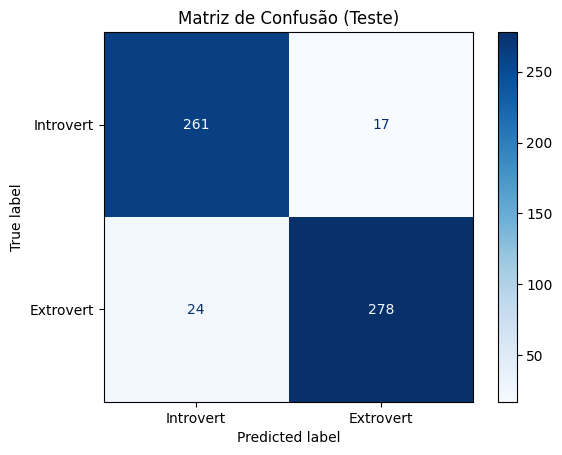

In [27]:

# === 6. Avaliar no conjunto de teste ===
final_classifier = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=int(best_k)))
])

final_classifier.fit(X_train, y_train)
y_pred_test = final_classifier.predict(X_test)

print("\n=== MÉTRICAS FINAIS NO TESTE ===")
print(classification_report(y_test, y_pred_test, target_names=['Introvert', 'Extrovert'], digits=6))

# === 7. Matriz de confusão ===
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Introvert', 'Extrovert'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão (Teste)")
plt.show()